In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# **Orders data**

In [2]:
df=pd.read_csv('/kaggle/input/pizza-place-sales/order_details.csv')
df

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [3]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [4]:
df1=pd.read_csv('/kaggle/input/pizza-place-sales/orders.csv')

In [5]:
df1

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [6]:
orders=df.merge(df1, how='inner', on=['order_id'])

In [7]:
orders

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [8]:
orders.set_index('order_details_id')

,order_id,pizza_id,quantity,date,time
order_details_id,,,,,
1,1,hawaiian_m,1,2015-01-01,11:38:36
2,2,classic_dlx_m,1,2015-01-01,11:57:40
3,2,five_cheese_l,1,2015-01-01,11:57:40
4,2,ital_supr_l,1,2015-01-01,11:57:40
5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48618,21348,napolitana_s,1,2015-12-31,21:23:10


In [9]:
orders.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
dtype: int64

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
 4   date              48620 non-null  object
 5   time              48620 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


# **Pizzas data**

In [11]:
p=pd.read_csv('/kaggle/input/pizza-place-sales/pizzas.csv')

In [12]:
p

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [13]:
types= pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv', index_col=None, header=0, encoding='unicode_escape')

In [14]:
types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [15]:
p_types=p.merge(types, how='inner', on=['pizza_type_id'])

In [16]:
p_types

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [17]:
p_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
 4   name           96 non-null     object 
 5   category       96 non-null     object 
 6   ingredients    96 non-null     object 
dtypes: float64(1), object(6)
memory usage: 6.0+ KB


In [18]:
p_types.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
name             0
category         0
ingredients      0
dtype: int64

# **Final data-frame merging all sheets**

In [19]:
final=orders.merge(p_types,how='inner', on=['pizza_id']) 

In [20]:
final

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [21]:
final.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [22]:
finaldf=final.sort_values(by=['order_details_id'])

In [23]:
finaldf.set_index(['order_details_id'])

,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


## **Months** 

In [24]:
finaldf['Months'] = pd.to_datetime(finaldf['date'], infer_datetime_format=True).dt.month

## **Time**

In [25]:
finaldf['hours'] = pd.to_datetime(finaldf['time'], infer_datetime_format=True).dt.hour

In [26]:
finaldf

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Months,hours
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,11
473,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,11
1632,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1,11
2991,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1,11
3726,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33849,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",12,21
22025,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",12,21
22493,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12,21
13174,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",12,22


In [27]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 7364
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  Months            48620 non-null  int64  
 13  hours             48620 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 5.6+ MB


## **No of pizzas sold as per size in year**

In [28]:
finaldf['size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

## **No of pizzas sold as per category**

In [29]:
finaldf['category'].value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

# **Grouping of pizza_id with sum of price**

In [30]:
money = finaldf.groupby('pizza_id').agg({'price': lambda x: x.sum()})

In [31]:
finaldf.groupby(['pizza_id']) ['price'].sum()

pizza_id
bbq_ckn_l        20065.25
bbq_ckn_m        15510.50
bbq_ckn_s         6107.25
big_meat_s       21732.00
brie_carre_s     11352.00
                   ...   
the_greek_xl     13872.00
the_greek_xxl     1006.60
veggie_veg_l      8565.75
veggie_veg_m     10080.00
veggie_veg_s      5484.00
Name: price, Length: 91, dtype: float64

# **Money owner made as per pizza**

## **Top 10 most sold as per Money**

In [32]:
mh=money.sort_values(by=['price'],ascending=False).head(10)
mh

,price
pizza_id,
thai_ckn_l,28323.75
five_cheese_l,25141.50
four_cheese_l,22850.35
spicy_ital_l,22576.00
big_meat_s,21732.00
southw_ckn_l,20604.75
bbq_ckn_l,20065.25
cali_ckn_l,18571.25
classic_dlx_m,18544.00


## **last 10 sold as per Money**

In [33]:
ml=money.sort_values(by=['price'],ascending=False).tail(10)
ml

,price
pizza_id,
the_greek_s,3600.00
ital_cpcllo_s,3600.00
soppressata_s,3600.00
mediterraneo_s,3456.00
ital_supr_s,2425.00
mexicana_s,1920.00
green_garden_l,1903.50
ckn_alfredo_s,1224.00
calabrese_s,1212.75


# **1.How many customers do we have each day? Are there any peak hours?**


In [34]:
finaldf['date'].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

## **Calculating Peak time**

In [35]:
finaldf['hours'].value_counts().sort_values(ascending=False)

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hours, dtype: int64

Text(0.5, 1.0, 'No of orders (through a year)in a timeslot')

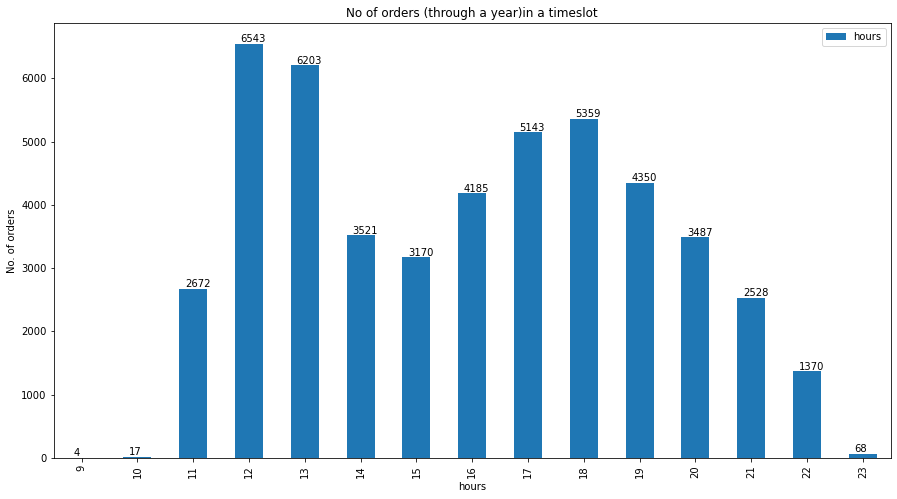

In [36]:
finaldf.groupby('hours').agg('hours').count().to_frame().plot(kind='bar',figsize=(15,8))

#step to add label at the plot
for i, v in enumerate(finaldf.groupby('hours') \
                      .agg({'hours': lambda x: len(x)})['hours']):
    plt.text(i - .15, v + 25, int(v), color='black')
    
plt.ylabel('No. of orders')
plt.title('No of orders (through a year)in a timeslot')

**peak time 1 from 12am to 1pm**<br>
**Peak time 2 from 5pm to 6pm**

# **2.How many pizzas are typically in order? Do we have any bestsellers?**

## **No of Pizzas typically ordered**

In [37]:
orders['quantity'].value_counts()
#most of the times 1 pizza is ordered in a order

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

Text(0.5, 1.0, 'No. of Pizzas are typically ordered')

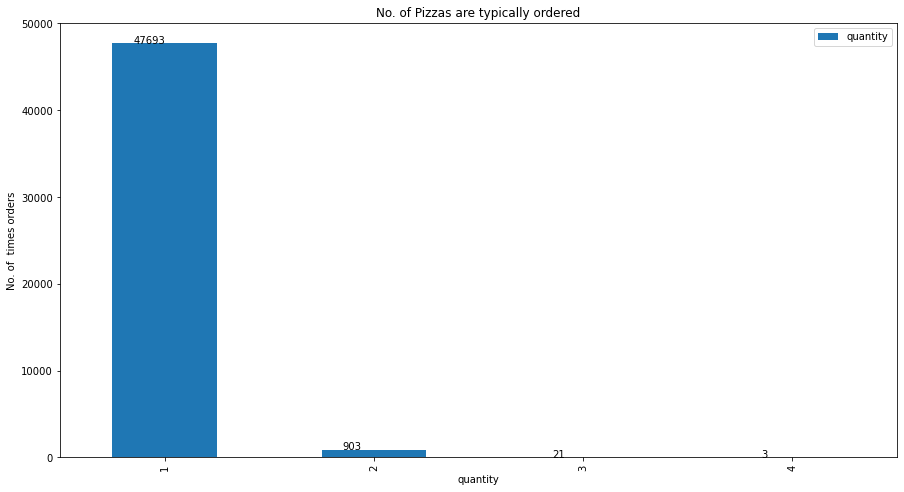

In [38]:
finaldf.groupby('quantity').agg('quantity').count().to_frame().plot(kind='bar',figsize=(15,8))

#step to add label at the plot
for i, v in enumerate(finaldf.groupby('quantity') \
                      .agg({'quantity': lambda x: len(x)})['quantity']):
    plt.text(i - .15, v + 25, int(v), color='black')
    
plt.ylabel('No. of  times orders')
plt.title('No. of Pizzas are typically ordered')

## **Top 10 most sold as per money**

In [39]:
mh

,price
pizza_id,
thai_ckn_l,28323.75
five_cheese_l,25141.50
four_cheese_l,22850.35
spicy_ital_l,22576.00
big_meat_s,21732.00
southw_ckn_l,20604.75
bbq_ckn_l,20065.25
cali_ckn_l,18571.25
classic_dlx_m,18544.00


Text(0.5, 1.0, ' Top 10 revenue generated from certain pizza_id')

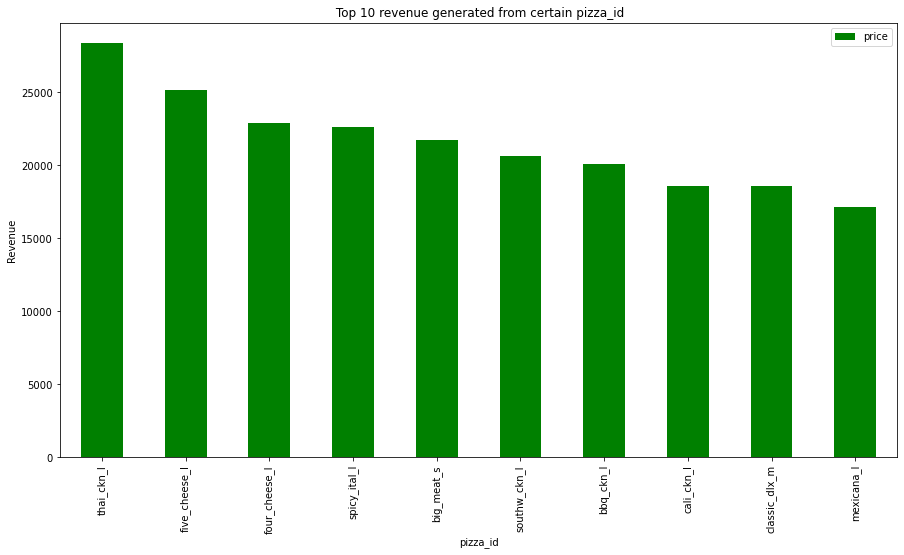

In [40]:
finaldf.groupby('pizza_id').agg('price').sum().sort_values(ascending=False).head(10).to_frame().plot(kind='bar',color='g',figsize=(15,8))

plt.ylabel('Revenue')
plt.title(' Top 10 revenue generated from certain pizza_id')

## **Top 10 most sold as per no of times ordered**

In [41]:
finaldf['pizza_id'].value_counts().head(10)

big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
spicy_ital_l     1088
hawaiian_s       1001
southw_ckn_l      993
bbq_ckn_l         967
bbq_ckn_m         926
Name: pizza_id, dtype: int64

Text(0.5, 1.0, 'Top 10 most sold as per no. of times ordered')

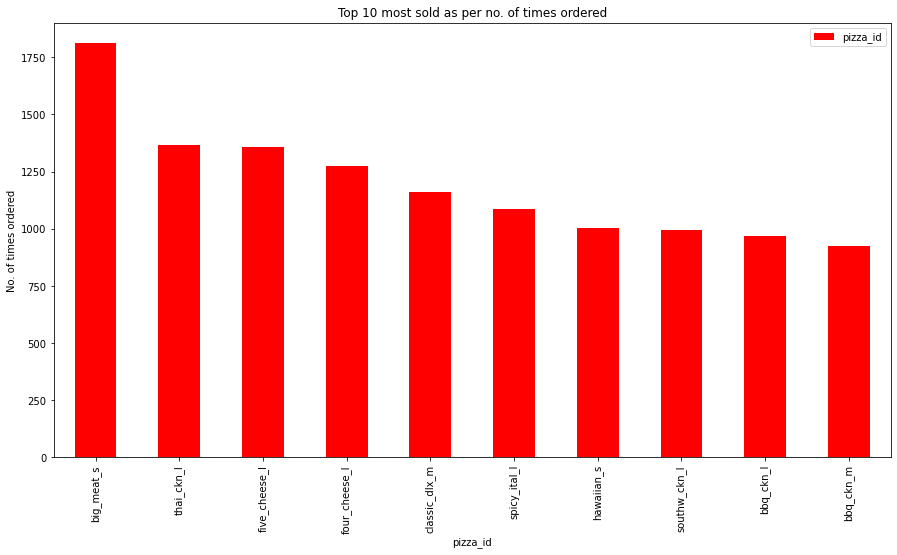

In [42]:
finaldf.groupby('pizza_id').agg('pizza_id').count().sort_values(ascending=False).head(10).to_frame().plot(kind='bar',color='red',figsize=(15,8))


plt.ylabel('No. of times ordered')
plt.title('Top 10 most sold as per no. of times ordered')

# **3.How much money did we make this year? Can we identify any seasonality in the sales?**


In [43]:
finaldf['price'].sum()

801944.7000000001

**or**

In [44]:
money['price'].sum()

801944.7

## **No. of pizzas ordered per month**

In [45]:
finaldf['Months'].value_counts().sort_values(ascending=False)

7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: Months, dtype: int64

Text(0.5, 1.0, 'No. of pizzas sold per month')

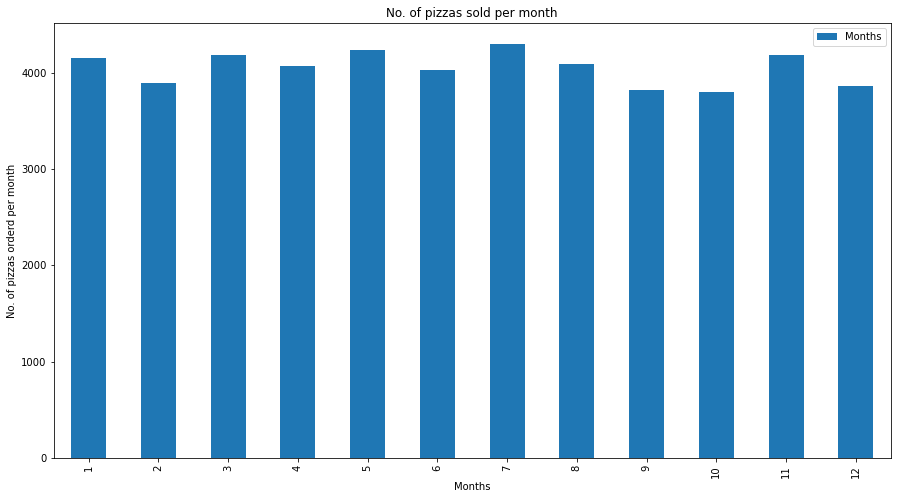

In [46]:
finaldf.groupby('Months').agg('Months').count().to_frame().plot(kind='bar',figsize=(15,8))


plt.ylabel('No. of pizzas orderd per month')
plt.title('No. of pizzas sold per month')

#  **4.Are there any pizzas we should take off the menu, or any promotions we could leverage?**

## **least sold as per money**

In [47]:
ml

,price
pizza_id,
the_greek_s,3600.00
ital_cpcllo_s,3600.00
soppressata_s,3600.00
mediterraneo_s,3456.00
ital_supr_s,2425.00
mexicana_s,1920.00
green_garden_l,1903.50
ckn_alfredo_s,1224.00
calabrese_s,1212.75


Text(0.5, 1.0, 'Last 10 revenue generated from certain pizza_id')

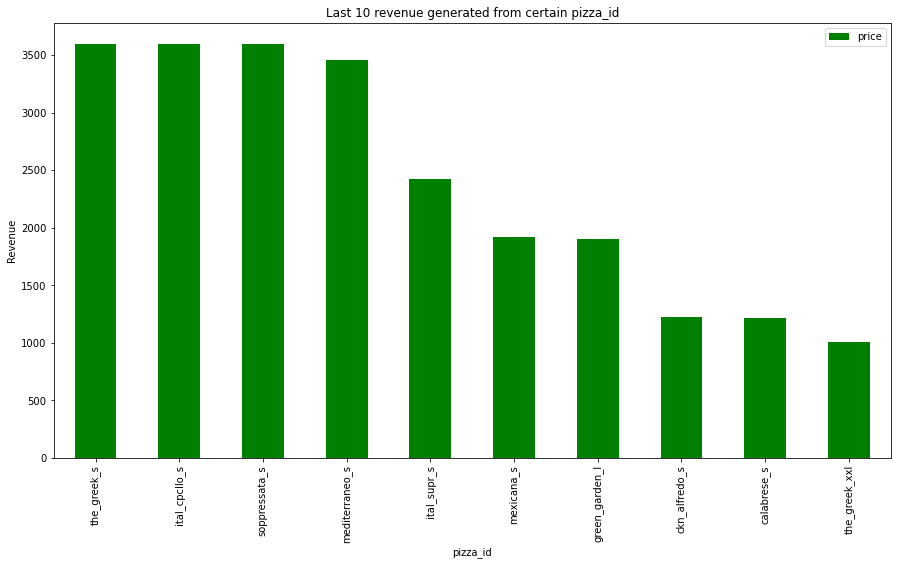

In [48]:
finaldf.groupby('pizza_id').agg('price').sum().sort_values(ascending=False).tail(10).to_frame().plot(kind='bar',color='g',figsize=(15,8))

plt.ylabel('Revenue')
plt.title('Last 10 revenue generated from certain pizza_id')

## **least sold as per no of times ordered**

In [49]:
finaldf['pizza_id'].value_counts().tail(10)
#we can remove the_greek_xxl as it being sold just 28 times this year

spinach_supr_m    266
the_greek_l       255
ital_supr_s       194
ital_veggie_l     190
ckn_alfredo_l     187
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: pizza_id, dtype: int64

Text(0.5, 1.0, 'Last 10 least sold as per no. of times ordered')

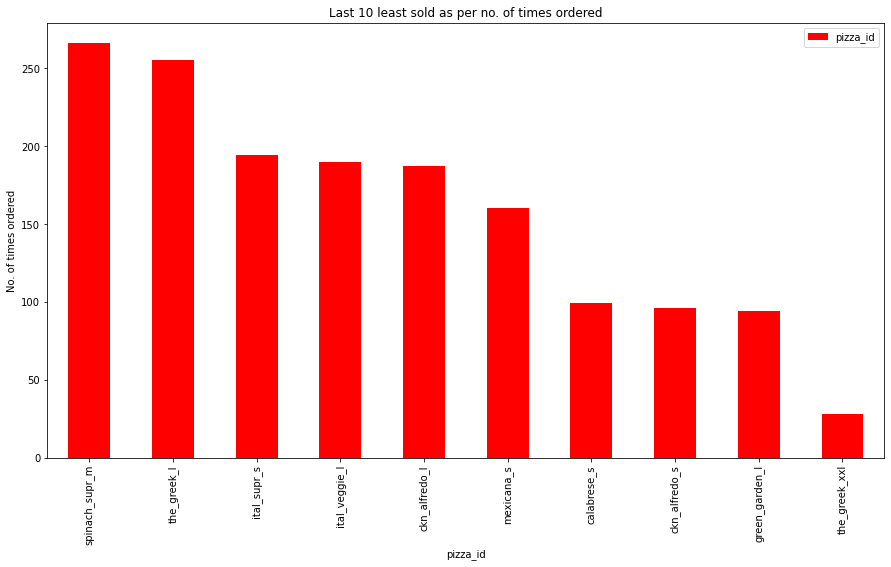

In [50]:
finaldf.groupby('pizza_id').agg('pizza_id').count().sort_values(ascending=False).tail(10).to_frame().plot(kind='bar',color='red',figsize=(15,8))

plt.ylabel('No. of times ordered')
plt.title('Last 10 least sold as per no. of times ordered')

# **Exporting file**

In [51]:
finaldf.to_csv('final.csv')

#### **Project by**
#### **Rakesh kudmulwar**
[linkedIn](https://www.linkedin.com/in/rakesh-kudmulwar-b21a89152/)   **|**   [GitHub](https://github.com/Rakesh-Kudmulwar)